***DATA EXPLORATION AND VISUALIZATION ASSESSMENT***


(PROJECT: Story Telling on Used cars reviews)
### Data Source: [Kaggle](https://www.kaggle.com/datasets/pratyushpuri/used-car-sales-listings-dataset-2025).

In [21]:
# import libraries

import pandas as pd                     # for data manipulation and cleaning
import matplotlib.pyplot as plt         # for data visulization
import seaborn as sns                   # for data visulization
import plotly.express as px             # for data visulization

# **Loading Dataset**

In [22]:
#Loading Dataset
cars_data = pd.read_csv("/content/used_car_listings.csv")

In [8]:
#cars_data.head(5)
cars_data.tail(5)

,listing_id,vin,make,model,year,trim,body_type,fuel_type,transmission,mileage,price,condition,location,seller_type,features
2063,2064,06B83BVF8F2W81547,Skoda,Kushaq,2023,Sport,Pickup,Petrol,Automatic,24566,34696.0,like new,"Shahjahanpur, KA, India",Certified Pre-Owned,"Blind Spot Monitor, Keyless Entry, Panoramic R..."
2064,2065,4P7083L79MBVK5696,Mahindra,Scorpio,2016,XSE,SUV,Diesel,Automatic,122459,2642.0,excellent,"Marques, PR, Brazil",Dealer,"Adaptive Cruise Control, Backup Camera, LED He..."
2065,2066,5RERFW1M7B00A4061,Audi,A6,2018,EX,Hatchback,Diesel,DCT,120452,7093.0,good,"Dhanbad, KL, India",Private Party,"Adaptive Cruise Control, Android Auto, Blind S..."
2066,2067,DJB6DBAS5UNNX0757,Skoda,Kushaq,2021,LX,MPV,Petrol,Manual,57043,11296.0,excellent,"Caitlinstad, NL, Canada",Certified Pre-Owned,"Backup Camera, Panoramic Roof, Parking Sensors..."
2067,2068,8BUANECR64R9L0827,Chevrolet,Malibu,2024,Platinum,Sedan,Diesel,Automatic,20218,23558.0,excellent,"Stadtroda, HH, Germany",Certified Pre-Owned,"Adaptive Cruise Control, Android Auto, Apple C..."


In [4]:
#checking the shape of the data
cars_data.shape

(2068, 15)

In [5]:
#checking datatypes
cars_data.dtypes

,0
listing_id,int64
vin,object
make,object
model,object
year,int64
trim,object
body_type,object
fuel_type,object
transmission,object
mileage,int64


In [7]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   listing_id    2068 non-null   int64  
 1   vin           2068 non-null   object 
 2   make          2068 non-null   object 
 3   model         2068 non-null   object 
 4   year          2068 non-null   int64  
 5   trim          1824 non-null   object 
 6   body_type     2068 non-null   object 
 7   fuel_type     2068 non-null   object 
 8   transmission  2068 non-null   object 
 9   mileage       2068 non-null   int64  
 10  price         2068 non-null   float64
 11  condition     2022 non-null   object 
 12  location      2068 non-null   object 
 13  seller_type   2068 non-null   object 
 14  features      1917 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 242.5+ KB


In [8]:
cars_data.isnull().sum()

,0
listing_id,0
vin,0
make,0
model,0
year,0
trim,244
body_type,0
fuel_type,0
transmission,0
mileage,0


# `Data Cleaning`

In [9]:
# save a copy of the data
cars_data_copy = cars_data.copy()

In [ ]:
# drop the `Unnamed` column
cars_data.drop(columns=["..."], inplace=True)

In [17]:
# Check for duplicates
#duplicates =
cars_data.duplicated()
#duplicates.sum()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2063,False
2064,False
2065,False
2066,False


In [18]:
cars_data.describe()

,listing_id,year,mileage,price
count,2068.000000,2068.000000,2068.000000,2068.000000
mean,1034.500000,2016.975822,115626.364603,9182.621857
std,597.124498,4.610981,80971.112603,9964.093618
min,1.000000,2005.000000,0.000000,1140.000000
25%,517.750000,2014.000000,57683.250000,2323.750000
50%,1034.500000,2017.000000,99212.000000,5448.500000
75%,1551.250000,2020.000000,159291.500000,11946.750000
max,2068.000000,2025.000000,418428.000000,72641.000000


In [5]:
cars_data.make.unique()

array(['Tesla', 'Nissan', 'Hyundai', 'Kia', 'Mercedes-Benz', 'Tata',
       'Chevrolet', 'Toyota', 'Skoda', 'Audi', 'Honda', 'Ford', 'Maruti',
       'BMW', 'Volkswagen', 'Mahindra'], dtype=object)

# DATA EXPLORATION AND VISUALIZATION

In [8]:
num_categories = cars_data['make'].unique()
#print('Number of make = ', num_make)

# Count the number of apps in each 'Category'.
num_cars_in_make = cars_data.make.value_counts()
print(num_cars_in_make)

make
Ford             146
Skoda            145
Audi             142
Mahindra         136
Chevrolet        135
Kia              133
Nissan           128
Honda            128
Mercedes-Benz    127
Tata             126
BMW              125
Hyundai          124
Volkswagen       123
Tesla            117
Maruti           117
Toyota           116
Name: count, dtype: int64


In [12]:
num_cars_in_make.values

array([146, 145, 142, 136, 135, 133, 128, 128, 127, 126, 125, 124, 123,
       117, 117, 116])

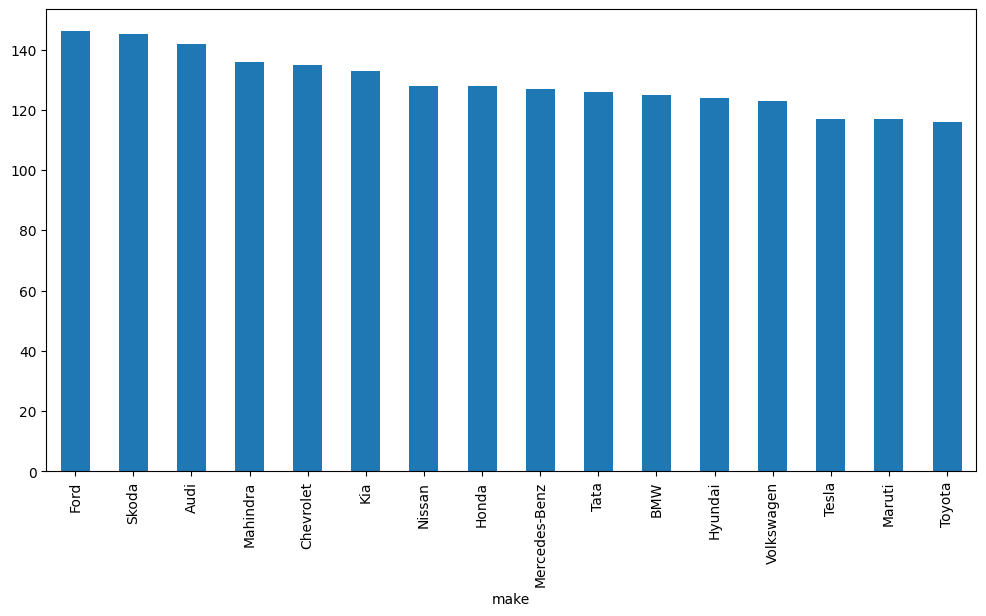

In [17]:
plt.figure(figsize=(12, 6)) #, barh
num_cars_in_make.plot(x = num_cars_in_make.index, y = num_cars_in_make.values, kind='bar');

/tmp/ipython-input-1693380261.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



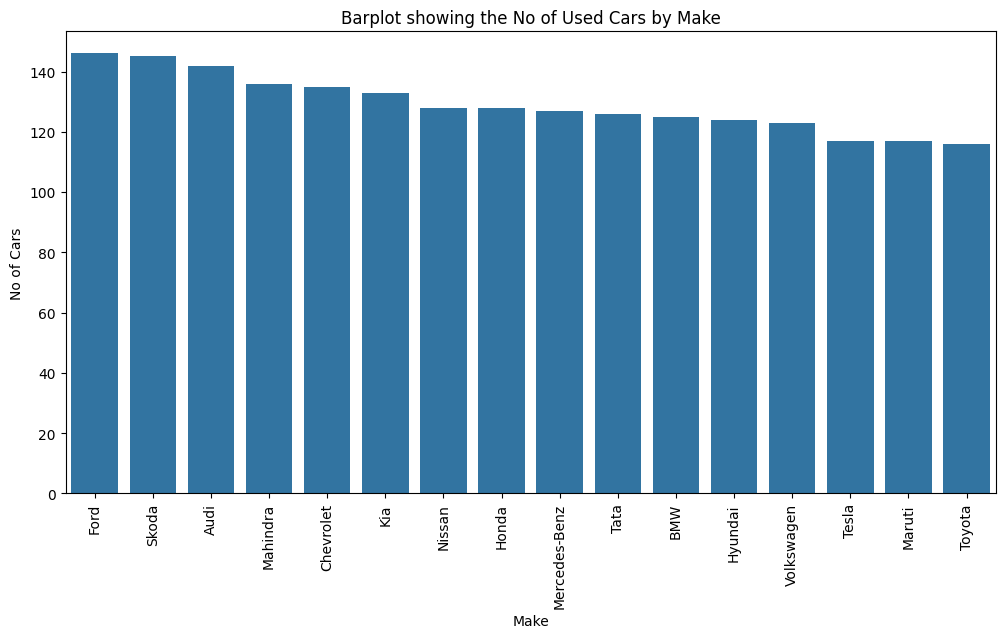

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

ax = sns.barplot(x = num_cars_in_make.index, y = num_cars_in_make.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Add x and y label axis
plt.xlabel('Make')
plt.ylabel('No of Cars')
# Add plot title
plt.title('Barplot showing the No of Used Cars by Make');

In [38]:
# Using plotly
fig = px.bar(
        x = num_cars_in_make.index, # index = Make name
        y = num_cars_in_make.values, # value = count
)

fig.update_layout(
    title='Barplot showing the No of Used Cars by Make',
    xaxis_title='Make',
    yaxis_title='No of Cars'
)

fig.show()

In [42]:
mileage_of_cars=cars_data.groupby("make")["mileage"].sum().sort_values(ascending=False)
mileage_of_cars

,mileage
make,
Mahindra,16987319
Audi,16966071
Chevrolet,16745929
Skoda,16134503
Mercedes-Benz,16117266
Ford,16097922
Kia,15689705
Nissan,15326000
Honda,15273547


In [51]:
# Group by Category and sum the installs
mileage_of_cars = cars_data.groupby('make')['mileage'].sum().sort_values(ascending=False).reset_index()

# Create a horizontal bar chart
fig = px.bar(mileage_of_cars, x="mileage", y="make", color="make", title='Most Popular Used Cars by Mileage')
fig.show()

In [47]:
cars_data.corr(numeric_only=True)

,listing_id,year,mileage,price
listing_id,1.000000,-0.019230,0.013799,-0.009792
year,-0.019230,1.000000,-0.815206,0.750634
mileage,0.013799,-0.815206,1.000000,-0.642601
price,-0.009792,0.750634,-0.642601,1.000000


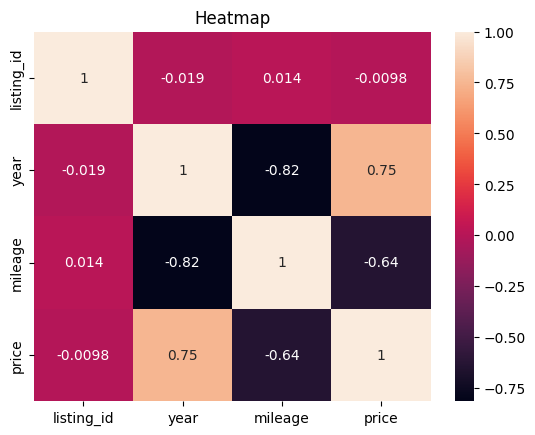

In [48]:
# plt.figure(figsize=(10,8))
sns.heatmap(cars_data.corr(numeric_only=True), annot=True)
plt.title("Heatmap");

In [17]:
cars_data.year.unique()

array([2019, 2024, 2018, 2023, 2020, 2013, 2017, 2015, 2014, 2011, 2025,
       2016, 2021, 2022, 2012, 2006, 2007, 2010, 2009, 2005, 2008])

In [ ]:
cars_without_outliers = cars_data.query("year<=...")

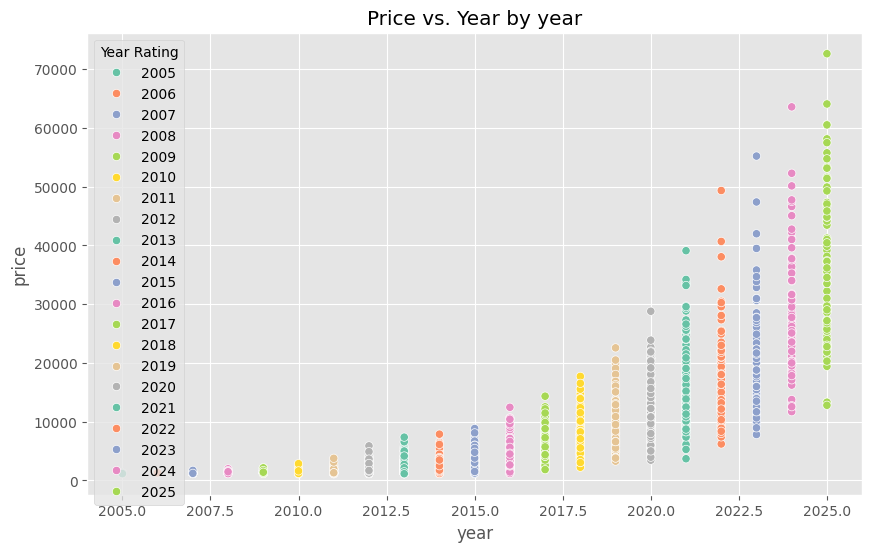

In [52]:
# Create scatterplots of Price vs. Year by year Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', hue='year',data=cars_data, palette='Set2')

# Add label and axis titles
plt.xlabel('year')
plt.ylabel('price')
plt.title('Price vs. Year by year')

# Add legend
plt.legend(title='Year Rating')

# show plot
plt.show()

In [43]:
plt.style.use("ggplot")

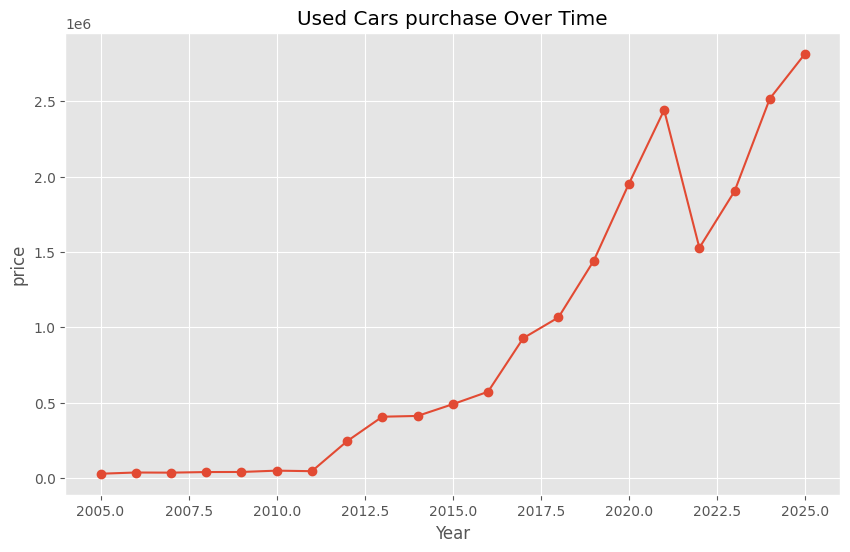

In [44]:
# Group by year and plot the number of used cars purchase over time.
cars_over_time = cars_data.groupby(cars_data['year'])['price'].sum()

plt.figure(figsize=(10,6))
plt.plot(cars_over_time.index, cars_over_time.values, marker='o')
plt.xlabel('Year')
plt.ylabel('price')
plt.title('Used Cars purchase Over Time')
plt.show()

/tmp/ipython-input-3981408428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='make', y='price', data=cars_data, palette='Set2')


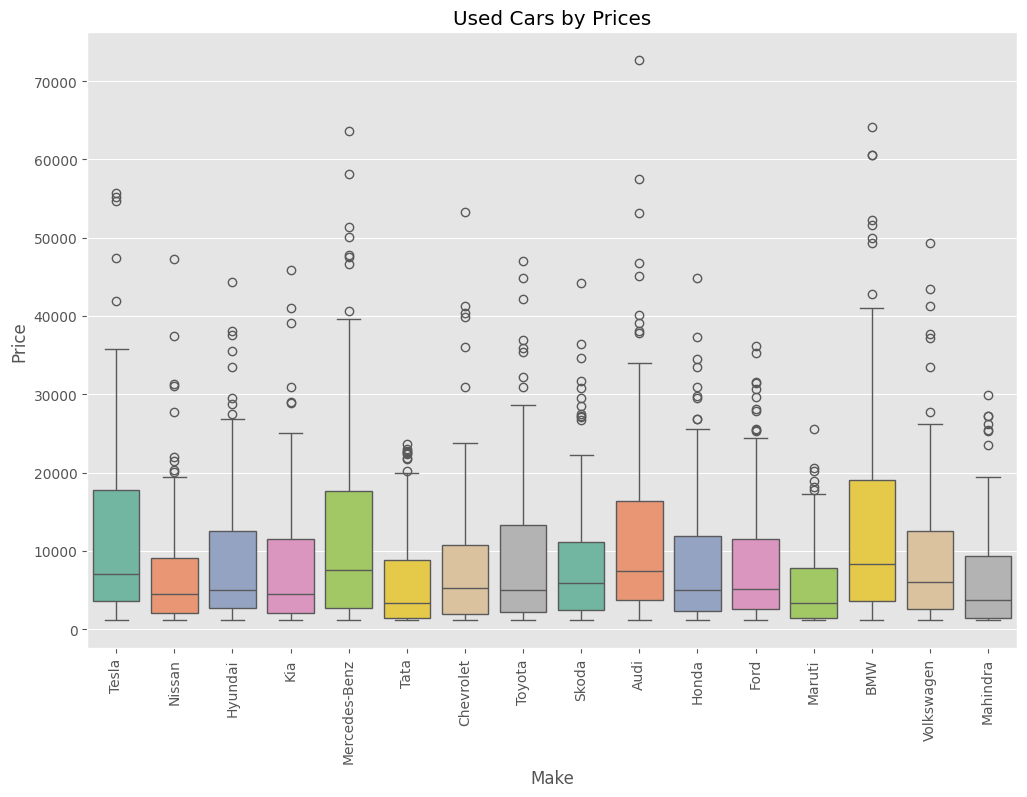

In [49]:
# Create a box plot of cars prizes by make
plt.figure(figsize=(12, 8))
sns.boxplot(x='make', y='price', data=cars_data, palette='Set2')

plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Used Cars by Prices')
plt.show()